In [14]:
from collections import deque, defaultdict

def find_positions(grid, rows, cols):
    """Find start and target positions with orientation."""
    start, target = None, None
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == "s":
                if c + 1 < cols and grid[r][c+1] == "s":
                    start = (r, c, 0)   # horizontal
                if r + 1 < rows and grid[r+1][c] == "s":
                    start = (r, c, 1)   # vertical
            if grid[r][c] == "S":
                if c + 1 < cols and grid[r][c+1] == "S":
                    target = (r, c, 0)
                if r + 1 < rows and grid[r+1][c] == "S":
                    target = (r, c, 1)
    return start, target


def is_valid_horizontal(grid, rows, cols, r, c):
    return 0 <= r < rows and 0 <= c < cols-1 and grid[r][c] != "H" and grid[r][c+1] != "H"


def is_valid_vertical(grid, rows, cols, r, c):
    return 0 <= r < rows-1 and 0 <= c < cols and grid[r][c] != "H" and grid[r+1][c] != "H"


def is_valid_rotation(grid, rows, cols, r, c):
    if r+1 >= rows or c+1 >= cols:
        return False
    for rr in (r, r+1):
        for cc in (c, c+1):
            if grid[rr][cc] == "H":
                return False
    return True


def count_shortest_paths(rows, cols, grid):
    start, target = find_positions(grid, rows, cols)
    if not start or not target:
        return 0

    # BFS structures
    queue = deque([start])
    distance = {start: 0}
    ways = defaultdict(int)
    ways[start] = 1

    while queue:
        row, col, orientation = queue.popleft()
        current_dist = distance[(row, col, orientation)]

        # Generate neighbors
        neighbors = []
        if orientation == 0:  # horizontal
            if is_valid_horizontal(grid, rows, cols, row, col-1):
                neighbors.append((row, col-1, 0))
            if is_valid_horizontal(grid, rows, cols, row, col+1):
                neighbors.append((row, col+1, 0))
            if is_valid_horizontal(grid, rows, cols, row-1, col):
                neighbors.append((row-1, col, 0))
            if is_valid_horizontal(grid, rows, cols, row+1, col):
                neighbors.append((row+1, col, 0))
        else:  # vertical
            if is_valid_vertical(grid, rows, cols, row-1, col):
                neighbors.append((row-1, col, 1))
            if is_valid_vertical(grid, rows, cols, row+1, col):
                neighbors.append((row+1, col, 1))
            if is_valid_vertical(grid, rows, cols, row, col-1):
                neighbors.append((row, col-1, 1))
            if is_valid_vertical(grid, rows, cols, row, col+1):
                neighbors.append((row, col+1, 1))

        # Rotation
        if is_valid_rotation(grid, rows, cols, row, col):
            neighbors.append((row, col, 1 - orientation))

        # Process neighbors
        for nr, nc, no in neighbors:
            state = (nr, nc, no)
            if state not in distance:
                distance[state] = current_dist + 1
                ways[state] = ways[(row, col, orientation)]
                queue.append(state)
            elif distance[state] == current_dist + 1:
                # Another shortest path found
                ways[state] += ways[(row, col, orientation)]

    return ways[target]


# -------- Example Run ----------
rows, cols = 5, 5
grid = [
    ["s","s","0","0","0"],
    ["0","H","0","0","H"],
    ["0","H","0","H","H"],
    ["0","H","0","0","H"],
    ["0","0","0","S","S"]
]

print(count_shortest_paths(rows, cols, grid))  # ✅ Number of shortest ways

1


In [ ]:
from collections import deque, defaultdict

def find_positions(grid, rows, cols):
    start, target = None, None
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == "s":
                if c + 1 < cols and grid[r][c+1] == "s":
                    start = (r, c, 0)   # horizontal
                if r + 1 < rows and grid[r+1][c] == "s":
                    start = (r, c, 1)   # vertical
            if grid[r][c] == "S":
                if c + 1 < cols and grid[r][c+1] == "S":
                    target = (r, c, 0)
                if r + 1 < rows and grid[r+1][c] == "S":
                    target = (r, c, 1)
    return start, target


def is_valid_horizontal(grid, rows, cols, r, c):
    return 0 <= r < rows and 0 <= c < cols-1 and grid[r][c] != "H" and grid[r][c+1] != "H"


def is_valid_vertical(grid, rows, cols, r, c):
    return 0 <= r < rows-1 and 0 <= c < cols and grid[r][c] != "H" and grid[r+1][c] != "H"


def is_valid_rotation(grid, rows, cols, r, c):
    """Check if we can rotate inside a 2x2 block starting at (r,c)."""
    if r+1 >= rows or c+1 >= cols:
        return False
    for r in (r, r+1):
        for cc in (c, c+1):
            if grid[r][cc] == "H":
                return False
    return True


def solve(rows, cols, grid):
    start, target = find_positions(grid, rows, cols)
    if not start or not target:
        return -1, 0  # no solution possible

    # BFS setup
    queue = deque([start])
    dist = {start: 0}              # minimum steps to reach state
    ways = defaultdict(int)        # number of shortest ways
    ways[start] = 1

    while queue:
        row, col, orient = queue.popleft()
        step_count = dist[(row, col, orient)]

        # Generate possible moves
        neighbors = []
        if orient == 0:  # horizontal
            if is_valid_horizontal(grid, rows, cols, row, col-1):
                neighbors.append((row, col-1, 0))
            if is_valid_horizontal(grid, rows, cols, row, col+1):
                neighbors.append((row, col+1, 0))
            if is_valid_horizontal(grid, rows, cols, row-1, col):
                neighbors.append((row-1, col, 0))
            if is_valid_horizontal(grid, rows, cols, row+1, col):
                neighbors.append((row+1, col, 0))
        else:  # vertical
            if is_valid_vertical(grid, rows, cols, row-1, col):
                neighbors.append((row-1, col, 1))
            if is_valid_vertical(grid, rows, cols, row+1, col):
                neighbors.append((row+1, col, 1))
            if is_valid_vertical(grid, rows, cols, row, col-1):
                neighbors.append((row, col-1, 1))
            if is_valid_vertical(grid, rows, cols, row, col+1):
                neighbors.append((row, col+1, 1))

        # rotation move
        if is_valid_rotation(grid, rows, cols, row, col):
            neighbors.append((row, col, 1 - orient))

        # Process neighbors
        for nr, nc, no in neighbors:
            state = (nr, nc, no)
            if state not in dist:
                dist[state] = step_count + 1
                ways[state] = ways[(row, col, orient)]
                queue.append(state)
            elif dist[state] == step_count + 1:
                ways[state] += ways[(row, col, orient)]

    if target not in dist:
        return -1, 0
    return dist[target], ways[target]


# ---------------- Main ----------------
if __name__ == "__main__":
    # Input
    rows, cols = map(, input().split())
    grid = [input().split() for _ in range(rows)]

    min_steps, num_paths = solve(rows, cols, grid)
    print(min_steps)   # minimum steps
    print(num_paths)   # number of shortest paths

ValueError: too many values to unpack (expected 2)

In [ ]:
from sys import stdin

class BankSystem:
    def __init__(self, initial_balance: int):
        self.balance = initial_balance
        self.transactions = []   # list of (type, amount, committed)
        self.commits = []        # snapshots of balance at each commit
        self.outputs = []        # results of read operations

    def read(self):
        self.outputs.append(self.balance)

    def credit(self, amount: int):
        self.balance += amount
        self.transactions.append(("credit", amount, False))

    def debit(self, amount: int):
        self.balance -= amount
        self.transactions.append(("debit", amount, False))

    def abort(self, txn_index: int):
        txn_index -= 1  # convert to 0-based
        if 0 <= txn_index < len(self.transactions):
            op, amt, committed = self.transactions[txn_index]
            if not committed:
                if op == "credit":
                    self.balance -= amt
                elif op == "debit":
                    self.balance += amt
                # mark as "neutralized" but keep record
                self.transactions[txn_index] = (op, amt, committed)

    def rollback(self, commit_index: int):
        commit_index -= 1
        if 0 <= commit_index < len(self.commits):
            self.balance = self.commits[commit_index]

    def commit(self):
        # mark all uncommitted transactions as committed
        self.transactions = [(op, amt, True) for op, amt, _ in self.transactions]
        # snapshot current balance
        self.commits.append(self.balance)

    def process_command(self, command: str):
        parts = command.strip().split()
        cmd = parts[0].lower()
        
        # Commands with integer arguments
        if cmd in {"credit", "debit", "abort", "rollback"}:
            if len(parts) < 2 or not parts[1].isdigit():
                return  # ignore invalid input
            arg = int(parts[1])
            if cmd == "credit":
                self.credit(arg)
            elif cmd == "debit":
                self.debit(arg)
            elif cmd == "abort":
                self.abort(arg)
            elif cmd == "rollback":
                self.rollback(arg)
        # Commands without arguments
        elif cmd == "read":
            self.read()
        elif cmd == "commit":
            self.commit()

    def get_outputs(self):
        return self.outputs


def main():
    # Read initial balance
    while True:
        line = stdin.readline()
        if not line:
            continue
        try:
            initial_balance = int(line.strip())
            if 1 <= initial_balance <= 1000:
                break
        except ValueError:
            continue

    # Read number of operations
    while True:
        line = stdin.readline()
        if not line:
            continue
        try:
            n = int(line.strip())
            if 1 <= n <= 50:
                break
        except ValueError:
            continue

    bank = BankSystem(initial_balance)

    # Read and process commands
    for _ in range(n):
        command = stdin.readline()
        if command:
            bank.process_command(command)

    # Print outputs
    print(*bank.get_outputs(), sep='\n')


if __name__ == "__main__":
    main()


Problem Description
Two friends went to the mall for shopping. While there, they decided to buy friendship bands.

The shop sells bands in pairs inside a case, which is exactly what they wanted. These bands could be of different shapes and sizes. These band pairs were displayed in a transparent box inside the shop. While most of them were fine i.e., two distinct and separate bands, in some cases the pairs of bands encased in the transparent box were not separate but were interlocked instead.

Now, the bands should not be interlocked because then it would mean cutting one of them to separate the two. However, that was the case and there were complaints regarding the same.

They did not want to miss out celebrating Friendship Day and desperately wanted the bands. Since the bands were packed in transparent cases, they could see the bands inside. They decided to select a good pair of bands from the case.

They took photos of the cases and fed it to an AI program that could mathematically detect if there was interlocking between bands or not. The band case is represented in a square matrix format of size S. The bands are depicted by the characters "1" and "2," where they represent the first and second band, respectively. The period symbol "." indicates an empty space.

The bands will only bend at right angles. One band will intersect the other exactly at a right angle, but they will never overlap at the corners. The character at the point of overlap indicates which band is on top, while the other character's band is underneath. To avoid confusion for them, the bands will not be kept adjacent and will have some space between them i.e. if a thread is running horizontal, then another thread will not run horizontal on the adjacent cells. vice versa for vertical also. the below assets_public/img represent the how the bands will not be arranged.

com.tcs.cv.automata.ei.middleware.DocxToHtmlConverter@7e0aadd0:image1.png

instead, it will be look like below.,
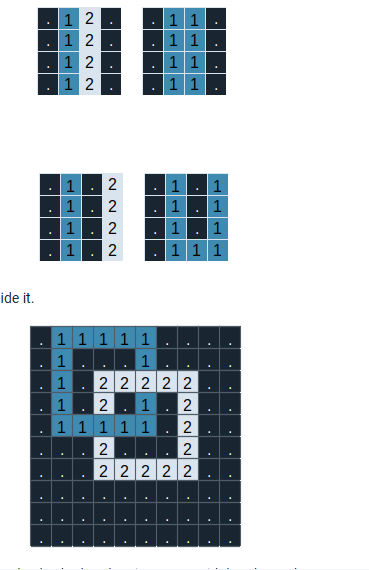

The image below is an example of the case and the bands inside it.

com.tcs.cv.automata.ei.middleware.DocxToHtmlConverter@7e0aadd0:image3.png

Help the friends choose a case with non-interlocked bands i.e., check whether the given case with bands can be separated without cutting one of the bands.

Constraints
5 < S < 25

Input
First line consists of an integer representing S, the side of the square matrix.

Next S lines will consist of S characters either ".", "1" or "2" representing the case with bands.

Output
Single integer denoting the number of overlaps if bands can be separated without cutting,

else print "Impossible"

Time Limit (secs)
1

Examples
Example 1

Input

10

.11111....

.1...1....

.1.22122..

.1.2.1.2..

.11211.2..

...2...2..

...22222..

..........

..........

..........

Output

Impossible

Explanation

The image below depicts the input described above.
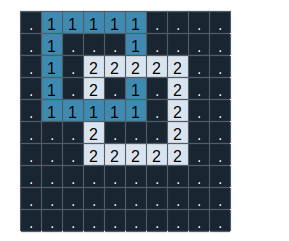

From the image it is easy to see that the two bands cannot be separated without cutting any one of it. Hence print Impossible.

Example 2

Input

10

.11111....

.1...1....

.1.22122..

.1.2.1.2..

.11111.2..

...2...2..

...22222..

..........

..........

..........

Output

2

Explanation

The image below depicts the input described above.

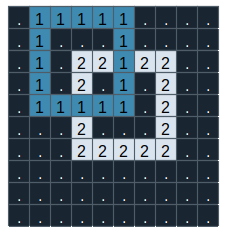

The band 1 is just placed above the band 2. They are not interlocked and can be separated without cutting. Since they are overlapping at two positions, the output is 2.

Example 3

Input

12

.1111111111.

.1........1.

.1...111111.

.1...1......

.1.221222...

.1.2.1..222.

.1.2.1....2.

.1.22122222.

.1...1......

.1...111111.

.1........1.

.1111111111.

Output

2

Explanation

The image below depicts the input described above.

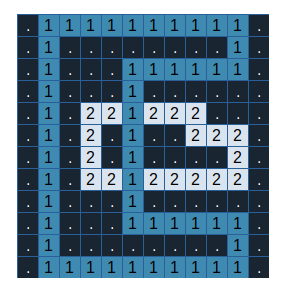

The band 1 is just placed above the band 2. They are not interlocked and can be separated without cutting. Since they are overlapping at two positions, the output is 2.



Problem Description
As the Transportation In-Charge of a reputed company, your responsibility is to ensure that buses are available for every employee and that they arrive on time.

Since pandemic restrictions have been lifted, but not completely, the number of people allowed on buses is still limited. Employees have started visiting the office regularly. You are given an M*M matrix, which represents the distance between each location. The value in the ith row and jth column represents the distance between the ith place and the jth place. Assume that all locations are connected by roads and that the first location is the office. The distance between the ith place and the jth place is the same as the distance between the jth place and the ith place. The top left element of this matrix is (0, 0) and is the Office location.

The number of people boarding the bus at each location is known a priori and is a part of the input.

Given the number of people that a bus can accommodate at one time, post restrictions, determine the number of buses required to pick up all employees. A bus can start from any location but must take only the shortest path from that location to the office. The bus can pick up employees at locations along its route. Assume that there is only one shortest route between the office and each remaining location.

Constraints
1 < M < 12

0 < 300 < Distance between locations

0 < 500 < Total number of employees

Input
First line consists of a single integer M, representing the number of locations including office.

Next M lines consist of M integers separated by space representing the distance matrix.

Next line consists of M-1 space separated integers representing the employees boarding at each corresponding location.

Last line consists of an integer representing the number of people that can travel in the bus at one time.

Output
Print a single integer representing the minimum number of buses required to pick up all employees.

Time Limit (secs)
1

Examples
Example 1

Input

4

0 10 10 30

10 0 30 20

10 30 0 10

30 20 10 0

23 52 11

25

Output

4

Explanation

The below diagram represents the above input.

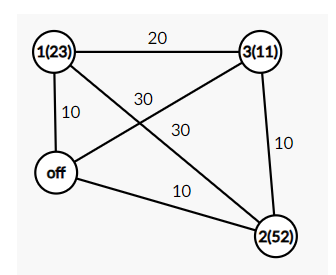

Based on the input, there are four locations, which we can be denoted as 0, 1, 2, and 3. The first location is the office, represented as 0 (visualized as "Off").

The shortest paths between individual location and office are,

Location 1-> office

Location 2-> office

Location 3-> Location 2-> office

The number of buses required will be 4: one bus from location 1, two buses from location 2, and one bus from location 3. The two buses starting at location 2 will pick up 50 people from there, and the remaining 2 people will board the bus coming from location 3.

Example 2

Input

5

0 10 10 60 60

10 0 30 10 10

10 30 0 30 30

60 10 30 0 30

60 10 30 30 0

15 15 15 15

25

Output

3

Explanation

For the given input the visualization of complete paths looks dense. Hence below image depicts only the shortest path from each location to office.

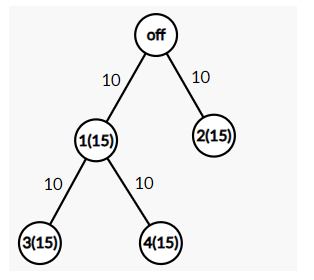
Three buses will originate from locations 2, 3, and 4 respectively. The buses starting from locations 3 and 4 will need to travel through location 1. Since they have enough seats to pick up the employees from location 1, three buses are sufficient. Therefore, the output 3.



Deva recently learned about angles in his mathematics class and is eager to explore them further! He began learning about angles using a wall clock.

He chose an ancient wall clock for his learning. This clock has only two hands: the hour hand and the minute hand. The hour hand moves to the next hour only after the minute hand completes a full rotation, staying at the current hour until then. The task is to form a given angle between the two hands of the clock. The rules for forming the given angle are as follows -

Starting from the given position, you can move both hands, but in opposite directions without crossing each other. For example, if you move the hour hand clockwise, you must move the minute hand counterclockwise, and vice versa, without them crossing over each other.
The hour hand can only be moved from one hour to the next or previous hour; it cannot be positioned between the hours. However, there are no such restrictions for the minute hand.
There is a cost attached to moving either the hour hand or minute hand. Likewise, the direction in which each of them is moved also has different costs attached to it as follows.
The cost of moving a hand clockwise incurs cost of A rupees
The cost of moving a hand anti-clockwise incurs cost of B rupees.
The cost of moving hour hand is X rupees
The cost of moving minutes hand is Y rupees.
All costs are for per degree.
You can form the given angle in any direction i.e. it can either be exterior angle or interior angle. Refer figures in example below for better understanding.
For example, if the time is 12:15 and one needs to form an angle of 300 degrees, one can achieve this by moving the minute hand 30 degrees in anti-clockwise direction (i.e., from the 3 to the 2), if the resulting cost is low, as shown in Figure 2 below.
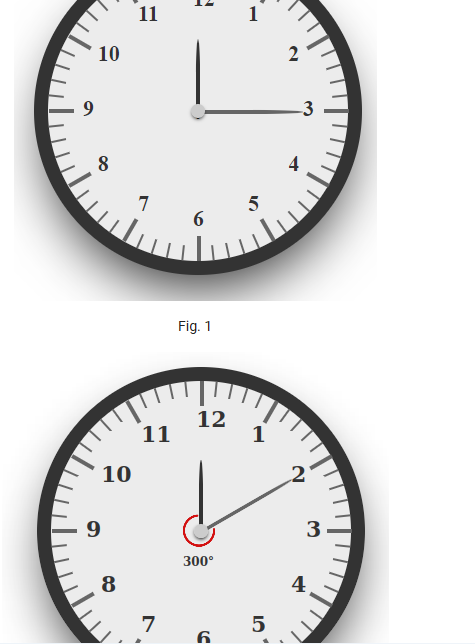

Fig.2

Given the initial time, an integer Q representing the number of queries, and four integers A, B, X, and Y as defined above, an angle will be provided in each query that one needs to form between the hands of the clock. For each query, determine the minimum cost required to form the specified angle and print the total minimum cost as the output.

Constraints
0 <= Angle <= 360 degrees and Angle will be an integer

1 <= A, B, X and Y <= 10

A, B, X and Y are unique.

1 <= Q <=20

Input
The first line contains the initial time in the format hours:minutes.

The second line contains an integer Q, representing the number of queries.

The third line contains four space delimited integers A, B, X, and Y respectively, as defined above.

The next Q lines each contain a single integer, representing the angle that you need to form between the hands of the clock.

Output
A single integer representing the sum of minimum cost for processing each query.

Time Limit (secs)
1

Examples
Example 1

Input

2:35

4

1 2 3 4

200

160

60

130

Output

670

Explanation

The initial time is 2:35, resembling the image below on the clock.

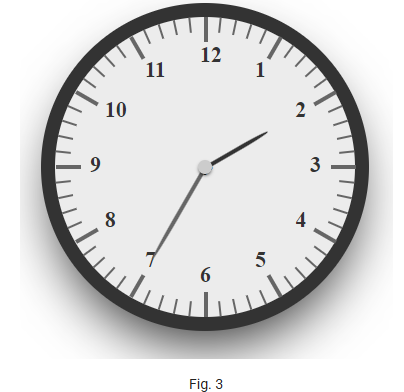

Fig. 3

The first query is to form 200 degrees between the two hands. For this, we can set up the hands like below.

Keep the hours hand in same position and move the minutes hand 10 degrees in clockwise direction. This will incur a cost of 10 * 4 * 1 = 40 rupees (10 degrees * cost of moving minutes hand * cost of moving clockwise).
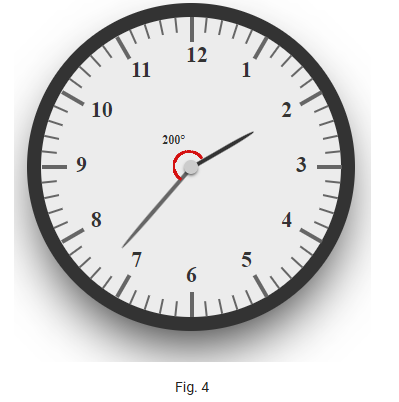

Fig. 4

Next query is to form 160 degrees between the two hands which is already present as shown below. Thus, we need not make any changes, in this query. Hence no cost incurred.

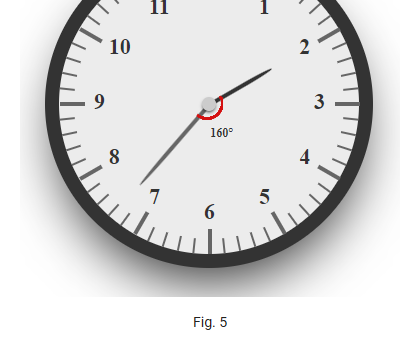

Fig. 5

Third query is to form 60 degrees between the two hands. For this, we can set up the hands like below.

Move the hours hand 90 degrees in clockwise direction and move the minutes hand 10 degrees in anti-clockwise direction. This will incur a cost of (90 * 3 * 1) + (10 * 4 * 2) = 350 rupees.

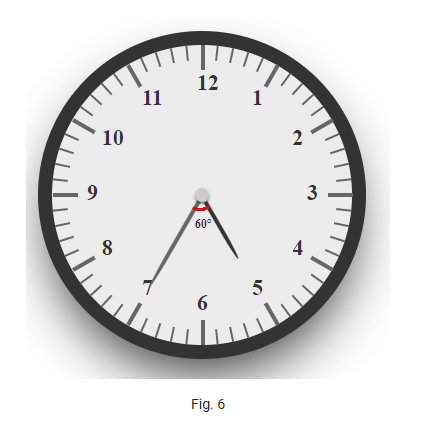
Fig. 6

Fourth query is to form 130 degrees between the two hands. For this, we can set up the hands like below.

Keep the hour hand in the same position and move the minutes hand 70 degrees in clockwise direction. This will incur a cost of 70 * 4 * 1 = 280 rupees.

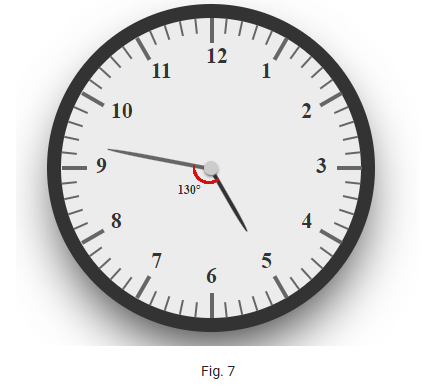

Fig. 7

Hence the total cost incurred is 40 + 0 + 350 + 280 = 670. Hence output is 670.

Example 2

Input

8:25

1

5 8 3 9

68

Output

990

Explanation

The initial time is 8:25, resembling the image below on the clock.
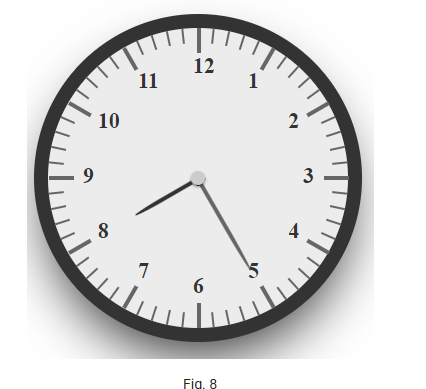

Fig. 8

The only query is to form 68 degrees between the two hands. For this, we can set up the hands like below.

Remain the hour hand in the same position and move the minutes hand 22 degrees in clockwise direction. This will incur a cost of 22 * 9 * 5 = 990 rupees (22 degrees * cost of moving minutes hand * cost of moving clockwise).
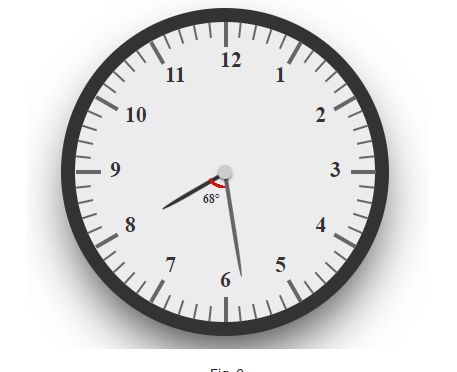

Fig. 9

Hence, the total cost incurred is 990 rupees. Hence, the output is 990.



Problem Description
Aarav and Arjun, twin brothers in the eighth grade, enjoy spending time together playing. They have already learned about shapes, area, perimeter, and other geometric concepts.

Their mother decided to introduce a game to enhance their geometric skills. She took some very thin straight and elastic sticks and arranged them on a 2D coordinate system, trying to form a closed figure.

Given the positions of the sticks in the coordinate system, she asked both of them to make a choice viz. 1) the closed figure, or 2) the left-over stick pieces (all the pieces that do not take part in forming the closed figure).

Aarav went with closed figure while Arjun went with left over pieces. Arjun is allowed to cut the left-over pieces in any manner that he chooses to attempt to fulfil his mother's ask as stated below.

She asks both of them to calculate the things in the below order.

Check whether closed figure is formed.
If formed,
Calculate its area.
Find whether Arjun can form the same shape and sized figure using any combination of the sticks he got.
If the sticks did not form a closed figure, they would ask her for a new arrangement. In that case, they will skip the previous steps i.e. calculation of area etc.
Solve the same problem that Aarav and Arjun are trying to solve.

Given the coordinates of the starting and ending points of the sticks placed in a 2D coordinate system, print the respective output following the output specification.

Constraints
1 <= N <= 20

0 <= x, y coordinates <= 50

There can at most be one closed figure.

Closed figure is a figure with number of sides >= 3.

Left-over sticks will not intersect with lines of closed figure, but themselves they may intersect.

No more than two lines intersect at the same point.

All computations must be accurate, including round-off, up to two decimal points.

Input
First line consists of an integer N, denoting the number of sticks placed in the 2D coordinate system.

Next N lines consist of four space separated integers x1 y1 x2 y2, where (x1, y1) and (x2, y2) denote the starting and ending points of the stick.

Output
In the first line, print "Yes" or "No" indicating whether a closed figure is formed or not.

If the first line of output is "Yes", then two more lines should be printed.

Second line - Print "Yes" if Arjun can arrange the leftover stick pieces to form a figure that is both the same shape and the same size. He is allowed to cut and join the leftover sticks. Also use the part of sticks hanging out of closed figure.
Third line - Print the area of the closed figure up to 2 decimal points.
Time Limit (secs)
1

Examples
Example 1

Input

4

2 1 2 6

5 1 5 6

0 2 6 2

0 5 6 5

Output

Yes

No

9.00

Explanation
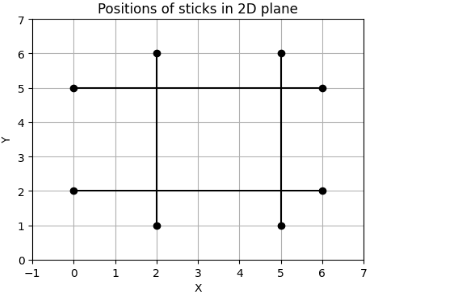

Here, you can see that a closed figure is formed. So, print "Yes" in the first line and the next two lines of output do exist.

As you can see that with the left-over sticks, one cannot form the closed figure of same shape and size. Hence, print "No" on the second line.

And the area of the closed figure is 9, which we need to print up to 2 decimal points, hence print 9.00

Hence, the output looks like below -

Yes

No

9.00

Example 2

Input

5

4 1 4 5

5 0 1 4

1 2 5 6

0 0 3 1

5 2 5 5

Output

Yes

Yes

4.00

Explanation

The above input when plotted looks like below.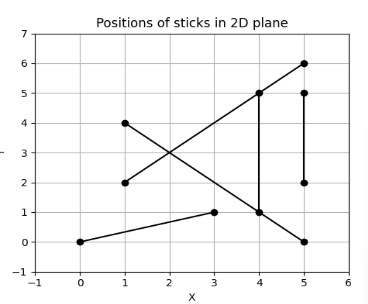

Here, you can see that a closed figure is formed. So, print "Yes" in the first line and the next two lines of output do exist.

As you can see that with the left-over sticks, you can form the closed figure of same shape and size. Hence, print "Yes" on the second line.

And the area of the closed figure is 4, which we need to print up to 2 decimal points, hence print 4.00

Hence, the output looks like below -

Yes

Yes

4.00

Example 3

Input

6

0 4 0 6

1 2 4 4

5 5 5 1

1 6 4 4

1 4 3 1

4 2 6 3

Output

No

Explanation

The above input when plotted looks like below.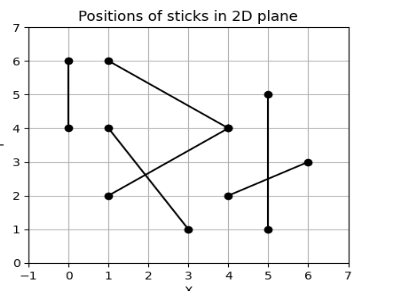

Since there is no closed figure formed, print "No" and the second and third lines of output don't exist.

